## <center>Automatic Differentiation</center>

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
x = tf.Variable(100.0)

You can think of ```GradientTape``` as a recorder or a tape that records or watches the operations(or equations to be more generic)

In [3]:
with tf.GradientTape() as tape:
    
    y = x**3

Now we can compute the gradient of `y` with respect to `x` at `x=100`

In [4]:
tape.gradient(target=y, sources=x)

<tf.Tensor: shape=(), dtype=float32, numpy=30000.0>

at `x=100`<br> `dy/dx = 3*x^2 = 3*100^2 = 30000`

We can pass multiple variables and get multiple gradients for each one

In [5]:
x = tf.Variable(10.)
z = tf.Variable(4.)

In [6]:
with tf.GradientTape() as tape:
    
    y = x**3 + z**2

In [7]:
tape.gradient(target=y, sources=[x, z])

[<tf.Tensor: shape=(), dtype=float32, numpy=300.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=8.0>]



**partial derivative of y with respect to x = 3xx^2 = 3x10^2 = 300.0**<br>
**partial derivative of y with respect to z = 2xz = 2x4 = 8.0**

The gradients can be calculated with respect to multi dimensional arrays as well

In [8]:
x = tf.Variable(np.random.random((3,4)))
x

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float64, numpy=
array([[0.41807756, 0.23889053, 0.07953801, 0.01519363],
       [0.81141726, 0.9226053 , 0.68875853, 0.74529282],
       [0.59713035, 0.05598551, 0.97899269, 0.10766788]])>

In [9]:
with tf.GradientTape() as tape:
    
    y = x**2

In [10]:
tape.gradient(target=y, sources=x)

<tf.Tensor: shape=(3, 4), dtype=float64, numpy=
array([[0.83615511, 0.47778106, 0.15907603, 0.03038727],
       [1.62283451, 1.84521061, 1.37751705, 1.49058564],
       [1.1942607 , 0.11197101, 1.95798538, 0.21533575]])>

The gradient refers to the following matrix

## Example of Gradient Descent 

We try to optimize the following functions using gradient tapes: `y = 4x^4 - 3*x^3 - 3*x^2`

In [111]:
from tqdm import tqdm_notebook

In [112]:
lr = 0.0001

In [113]:
x_data = []
y_data = []

In [114]:
lr = 0.001

In [115]:
x = tf.Variable(-0.1)
# z = tf.Variable(3.0)

In [116]:
for _ in tqdm_notebook(range(10000)):
    with tf.GradientTape() as tape:
        tape.watch([x])
#         y = 4*x**2 + 100
        y = 4*x**4 - 3*x**3 - 3*x**2

    
    grad = tape.gradient(y,x)
    x = x - lr*grad
#     z = z - lr*z_grad

    x_data.append(x.numpy())
    y_data.append(y.numpy())

/home/bxm200000/anaconda3/envs/bert_keyword/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


  0%|          | 0/10000 [00:00<?, ?it/s]

In [117]:
y

<tf.Tensor: shape=(), dtype=float32, numpy=-0.18583429>

In [118]:
x

<tf.Tensor: shape=(), dtype=float32, numpy=-0.39261883>

### Plot

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams["figure.figsize"] = (15,10)
%matplotlib inline

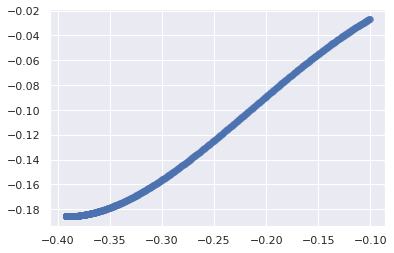

In [120]:
plt.scatter(x_data, y_data, alpha=0.5)
# plt.show()

In [121]:
y

<tf.Tensor: shape=(), dtype=float32, numpy=-0.18583429>

In [122]:
x

<tf.Tensor: shape=(), dtype=float32, numpy=-0.39261883>

In [124]:
tf.norm(tf.Variable([-3., 1]) - tf.Variable([2., 0]))

<tf.Tensor: shape=(), dtype=float32, numpy=5.0990195>

In [141]:
if tf.norm(tf.random.normal(
    shape=tf.Variable([1.,2.]).shape, mean=0.0, stddev=1.0, dtype=tf.dtypes.float32, seed=None, name=None
) - tf.Variable([1.,2.])) < 0.5:
    print("yo")
else:
    print("kk")

kk


In [134]:
tf.Variable([1.,2.])

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([1., 2.], dtype=float32)>

In [153]:
a = tf.constant([3.53,1.])

In [154]:
a.numpy()

array([3.53, 1.  ], dtype=float32)

In [155]:
a.numpy()

array([3.53, 1.  ], dtype=float32)

In [156]:
a

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([3.53, 1.  ], dtype=float32)>

In [171]:
tf.random.normal(
        shape=a.shape, mean=[0.0, 0.0],
        stddev=20/6.,
        dtype=tf.dtypes.float32, seed=None
    )

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.1622798, 0.8268807], dtype=float32)>